## Experiments with visualizing point clouds in dune grass

The 2 m x 2 m snippets of point clouds were extracted with Cloud Compare, 
and saved with options of "comma separated" and "save colors as floating point".


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the csv file into a numpy array. Dan Buscombe has a much faster way to do this in pysesa.
dn = r"C:\\crs\\proj\\point_clouds\\cc\\"
fn = r"p12.txt"
name = fn[0:-4]
print(name)
p = np.genfromtxt(dn+fn, delimiter=',')
print(np.shape(p))

p12
(10970, 9)


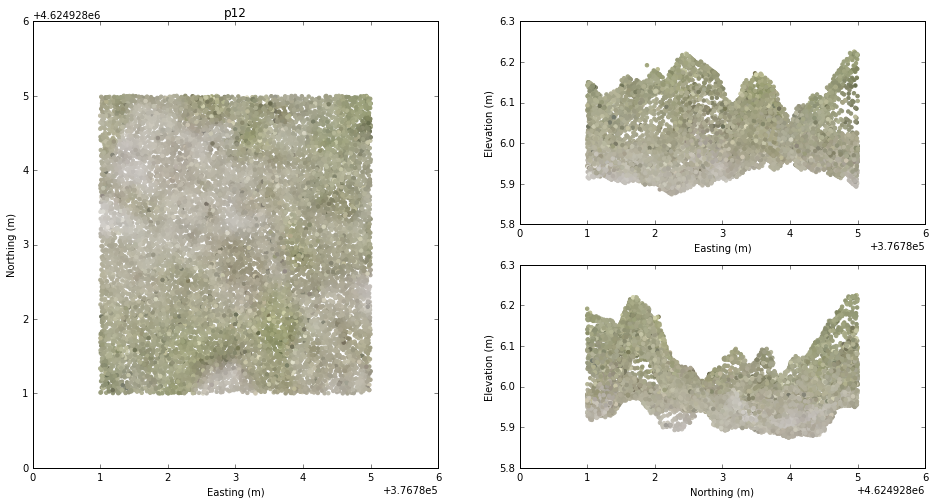

In [4]:
# plot points with original colors
plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(p[:,0],p[:,1],s=12,c=p[:,3:6],edgecolor='face')
plt.title(name)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.subplot(2,2,2)
plt.scatter(p[:,0],p[:,2],s=12,c=p[:,3:6],edgecolor='face')
plt.xlabel('Easting (m)')
plt.ylabel('Elevation (m)')
plt.subplot(2,2,4)
plt.scatter(p[:,1],p[:,2],s=12,c=p[:,3:6],edgecolor='face')
plt.xlabel('Northing (m)')
plt.ylabel('Elevation (m)')
plt.savefig(dn+name+".png",bbox_inches="tight")

In [5]:
# Mean of colors
np.mean(p[:,3:6],0)

array([ 0.6684859 ,  0.66133556,  0.57268486])

In [6]:
# covariance matrix
C = np.cov(p[:,3:6].T)
print("Covariance matrix:\n",C)
# eigenfunctions
eigval, eigvec = np.linalg.eig(C)
print("Eigenvalues:\n",eigval)
print("Eigenvectors:\n",eigvec)

Covariance matrix:
 [[ 0.00402228  0.0037004   0.00464577]
 [ 0.0037004   0.00348112  0.00420381]
 [ 0.00464577  0.00420381  0.00576657]]
Eigenvalues:
 [  1.29364327e-02   2.61675060e-05   3.07374706e-04]
Eigenvectors:
 [[-0.55444451 -0.77148789 -0.31208609]
 [-0.5095319   0.61118958 -0.60566041]
 [-0.65800344  0.17678727  0.7319684 ]]


In [7]:
# Normally, we would have to sort these, but in this case, the first eigenvalue is largest.
# Rotate the colors to the first eigenvector
W = eigvec[0,:]
t = W.T.dot(p[:,3:6].T)
print(np.shape(t))

(10970,)


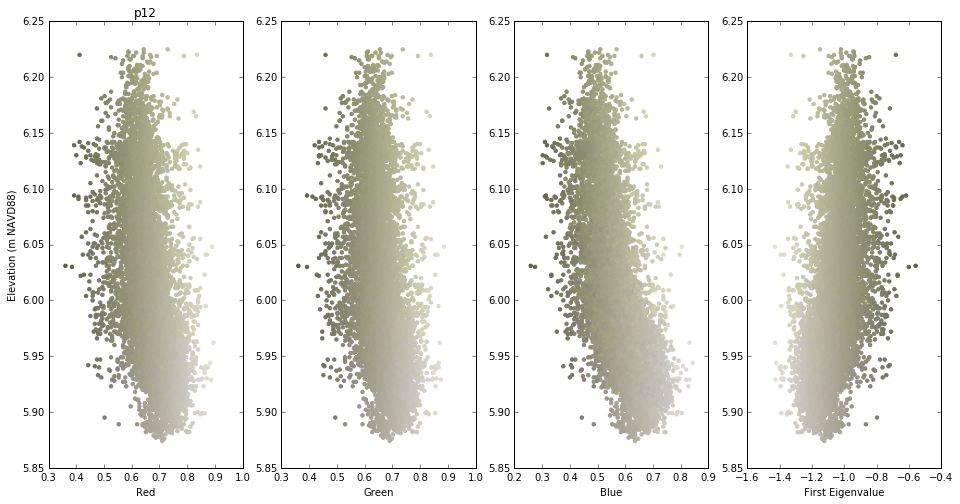

In [8]:
# plot color v. elevation, with original colors
plt.subplots(figsize=(16,8))
plt.subplot(1,4,1)
plt.scatter(p[:,3],p[:,2],s=12,c=p[:,3:6],edgecolor='face')
plt.title(name)
plt.ylabel('Elevation (m NAVD88)')
plt.xlabel('Red')
plt.subplot(1,4,2)
plt.scatter(p[:,4],p[:,2],s=12,c=p[:,3:6],edgecolor='face')
plt.xlabel('Green')
plt.subplot(1,4,3)
plt.scatter(p[:,5],p[:,2],s=12,c=p[:,3:6],edgecolor='face')
plt.xlabel('Blue')
# Plot first eigenvalue v. elevation w/ original colors
plt.subplot(1,4,4)
plt.scatter(t,p[:,2],s=12,c=p[:,3:6],edgecolor='face')
plt.xlabel('First Eigenvalue')
plt.savefig(dn+name+"_elev.png",bbox_inches="tight")

(1000, 1) (1000,)
Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [ 54.17236387] [ 82.08533159]


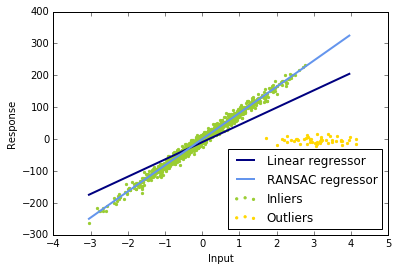

In [12]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
print(np.shape(X),np.shape(y))

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [11]:
# Fit line using all data
X = t
y = p[:,2]
print(np.shape(X))
print(np.shape(y))

(10970,)
(10970,)


In [10]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

C:\Users\csherwood\AppData\Local\Continuum\Anaconda\envs\IOOS3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 10970]